In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
btc = pd.read_csv('whole_data_for_ML_BTC.csv')

In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1499 non-null   int64  
 1   date              1499 non-null   object 
 2   market-price      1499 non-null   float64
 3   difficulty        1499 non-null   float64
 4   total-bitcoins    1499 non-null   float64
 5   blocks-size       1499 non-null   float64
 6   market-cap        1499 non-null   float64
 7   open              1499 non-null   float64
 8   high              1499 non-null   float64
 9   low               1499 non-null   float64
 10  close             1499 non-null   float64
 11  volume            1499 non-null   float64
 12  Number of Trades  1499 non-null   int64  
 13  TB Base Volume    1499 non-null   float64
 14  close_nextday     1499 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 175.8+ KB


In [4]:
btc.head()

,Unnamed: 0,date,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
0,0,2018-05-24,7511.91,4.219142e+12,17051050.0,169660.765346,1.285734e+11,7501.95,7730.73,7266.99,7575.01,37845.446595,253694,19012.981252,7457.00
1,1,2018-05-25,7576.78,4.306950e+12,17053275.0,169763.804470,1.294088e+11,7578.99,7649.55,7308.15,7457.00,26739.956640,239025,13830.870235,7333.96
2,2,2018-05-26,7465.12,4.306950e+12,17055487.5,169874.399246,1.263044e+11,7456.99,7620.00,7300.00,7333.96,19464.086071,212344,10377.955643,7338.99
3,3,2018-05-27,7334.71,4.306950e+12,17057712.5,169952.989056,1.245513e+11,7334.00,7400.00,7231.11,7338.99,18706.945515,198341,10258.276953,7099.00
4,4,2018-05-28,7344.56,4.306950e+12,17059937.5,170026.319757,1.234969e+11,7338.99,7437.00,7058.02,7099.00,27219.438963,233392,14409.487810,7461.29


In [5]:
btc.columns

Index(['Unnamed: 0', 'date', 'market-price', 'difficulty', 'total-bitcoins',
       'blocks-size', 'market-cap', 'open', 'high', 'low', 'close', 'volume',
       'Number of Trades', 'TB Base Volume', 'close_nextday'],
      dtype='object')

In [6]:
btc.drop(["Unnamed: 0"],axis=1,inplace=True)
btc

,date,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
0,2018-05-24,7511.91,4.219142e+12,17051050.00,169660.765346,1.285734e+11,7501.95,7730.73,7266.99,7575.01,37845.446595,253694,19012.981252,7457.00
1,2018-05-25,7576.78,4.306950e+12,17053275.00,169763.804470,1.294088e+11,7578.99,7649.55,7308.15,7457.00,26739.956640,239025,13830.870235,7333.96
2,2018-05-26,7465.12,4.306950e+12,17055487.50,169874.399246,1.263044e+11,7456.99,7620.00,7300.00,7333.96,19464.086071,212344,10377.955643,7338.99
3,2018-05-27,7334.71,4.306950e+12,17057712.50,169952.989056,1.245513e+11,7334.00,7400.00,7231.11,7338.99,18706.945515,198341,10258.276953,7099.00
4,2018-05-28,7344.56,4.306950e+12,17059937.50,170026.319757,1.234969e+11,7338.99,7437.00,7058.02,7099.00,27219.438963,233392,14409.487810,7461.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2023-05-14,26785.94,4.800553e+13,19373450.00,480426.470409,5.211071e+11,26775.27,27200.00,26560.53,26917.62,21594.803600,629537,10672.149830,27033.84
1495,2023-05-16,27191.97,4.800553e+13,19374556.25,480982.773739,5.291773e+11,27162.15,27296.89,26852.11,27033.84,33270.454510,815642,15970.999320,27405.61
1496,2023-05-17,27036.39,4.800553e+13,19375675.00,481245.144490,5.253327e+11,27033.85,27500.00,26544.71,27405.61,42958.977850,1016823,21634.022120,26821.28
1497,2023-05-18,27398.27,4.918830e+13,19376781.25,481512.612035,5.273197e+11,27405.62,27485.33,26361.20,26821.28,49198.651430,1057318,23659.893740,26880.26


In [7]:
target = btc['close_nextday'].values

In [8]:
btc.set_index('date', inplace=True)
btc.head()

,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
date,,,,,,,,,,,,,
2018-05-24,7511.91,4.219142e+12,17051050.0,169660.765346,1.285734e+11,7501.95,7730.73,7266.99,7575.01,37845.446595,253694,19012.981252,7457.00
2018-05-25,7576.78,4.306950e+12,17053275.0,169763.804470,1.294088e+11,7578.99,7649.55,7308.15,7457.00,26739.956640,239025,13830.870235,7333.96
2018-05-26,7465.12,4.306950e+12,17055487.5,169874.399246,1.263044e+11,7456.99,7620.00,7300.00,7333.96,19464.086071,212344,10377.955643,7338.99
2018-05-27,7334.71,4.306950e+12,17057712.5,169952.989056,1.245513e+11,7334.00,7400.00,7231.11,7338.99,18706.945515,198341,10258.276953,7099.00
2018-05-28,7344.56,4.306950e+12,17059937.5,170026.319757,1.234969e+11,7338.99,7437.00,7058.02,7099.00,27219.438963,233392,14409.487810,7461.29


In [9]:
btc.tail()

,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
date,,,,,,,,,,,,,
2023-05-14,26785.94,4.800553e+13,19373450.00,480426.470409,5.211071e+11,26775.27,27200.00,26560.53,26917.62,21594.80360,629537,10672.14983,27033.84
2023-05-16,27191.97,4.800553e+13,19374556.25,480982.773739,5.291773e+11,27162.15,27296.89,26852.11,27033.84,33270.45451,815642,15970.99932,27405.61
2023-05-17,27036.39,4.800553e+13,19375675.00,481245.144490,5.253327e+11,27033.85,27500.00,26544.71,27405.61,42958.97785,1016823,21634.02212,26821.28
2023-05-18,27398.27,4.918830e+13,19376781.25,481512.612035,5.273197e+11,27405.62,27485.33,26361.20,26821.28,49198.65143,1057318,23659.89374,26880.26
2023-05-19,26833.27,4.954970e+13,19377893.75,481744.210415,5.222342e+11,26821.28,27183.60,26630.00,26880.26,28754.13544,756295,13622.24812,27102.43


In [10]:
btc[0:4]

,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
date,,,,,,,,,,,,,
2018-05-24,7511.91,4.219142e+12,17051050.0,169660.765346,1.285734e+11,7501.95,7730.73,7266.99,7575.01,37845.446595,253694,19012.981252,7457.00
2018-05-25,7576.78,4.306950e+12,17053275.0,169763.804470,1.294088e+11,7578.99,7649.55,7308.15,7457.00,26739.956640,239025,13830.870235,7333.96
2018-05-26,7465.12,4.306950e+12,17055487.5,169874.399246,1.263044e+11,7456.99,7620.00,7300.00,7333.96,19464.086071,212344,10377.955643,7338.99
2018-05-27,7334.71,4.306950e+12,17057712.5,169952.989056,1.245513e+11,7334.00,7400.00,7231.11,7338.99,18706.945515,198341,10258.276953,7099.00


In [11]:
# btc_temp = btc.reset_index(drop=True)
# btc.head()

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
btc_scaled = scaler.fit_transform(btc)
btc_scaled

array([[6.63791448e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.26391648e-02, 4.21622723e-02, 6.66073176e-02],
       [6.73876997e-02, 1.93704893e-03, 9.56230946e-04, ...,
        1.16716499e-02, 2.82102112e-02, 6.46768527e-02],
       [6.56516855e-02, 1.93704893e-03, 1.90708981e-03, ...,
        9.91186638e-03, 1.89137536e-02, 6.47557720e-02],
       ...,
       [3.69932563e-01, 9.65935368e-01, 9.99046455e-01, ...,
        6.29724294e-02, 4.92190340e-02, 3.70427737e-01],
       [3.75558829e-01, 9.92027427e-01, 9.99521885e-01, ...,
        6.56433351e-02, 5.46733912e-02, 3.71353117e-01],
       [3.66774591e-01, 1.00000000e+00, 1.00000000e+00, ...,
        4.57889326e-02, 2.76485273e-02, 3.74838906e-01]])

In [13]:
import pickle
with open('BTCscaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [14]:
btc_scaled_df = pd.DataFrame(btc_scaled, columns=btc.columns,index=btc.index)
btc_scaled_df

,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
date,,,,,,,,,,,,,
2018-05-24,0.066379,0.000000,0.000000,0.000000,0.060562,0.066512,0.067772,0.065181,0.068459,0.041541,0.012639,0.042162,0.066607
2018-05-25,0.067388,0.001937,0.000956,0.000330,0.061248,0.067710,0.066537,0.065834,0.066607,0.026816,0.011672,0.028210,0.064677
2018-05-26,0.065652,0.001937,0.001907,0.000685,0.058699,0.065813,0.066087,0.065705,0.064677,0.017169,0.009912,0.018914,0.064756
2018-05-27,0.063624,0.001937,0.002863,0.000936,0.057260,0.063900,0.062740,0.064612,0.064756,0.016165,0.008988,0.018592,0.060990
2018-05-28,0.063777,0.001937,0.003820,0.001171,0.056394,0.063978,0.063303,0.061868,0.060990,0.027452,0.011300,0.029768,0.066675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-14,0.366039,0.965935,0.998090,0.995778,0.382841,0.366250,0.364002,0.371107,0.371939,0.019994,0.037428,0.019706,0.373763
2023-05-16,0.372351,0.965935,0.998566,0.997560,0.389467,0.372266,0.365476,0.375730,0.373763,0.035475,0.049703,0.033972,0.379596
2023-05-17,0.369933,0.965935,0.999046,0.998401,0.386310,0.370271,0.368567,0.370856,0.379596,0.048322,0.062972,0.049219,0.370428


In [15]:
 train_data, test_data = train_test_split(btc_scaled_df, test_size=0.1, shuffle=False) 

# check which close_nextday it's calculating

In [16]:
def create_dataset(data, time_steps):
    print(f"Input data type: {type(data)}")
    X, Y = [], []
    for i in range(len(data) - time_steps - 1):
        x = data[i:(i + time_steps), :12]
#       This means that for each sequence of time_steps length, the target value is the one that comes immediately after
#       that sequence.
        y = data[i + time_steps-1, 12] # Assuming the target variable close_nextday is the last column 
        print(f"i: {i}, x shape: {x.shape}, y: {y}")
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

In [17]:
# When this data is fed into the LSTM, each sequence of time_steps length is treated as a sequence of inputs, and the LSTM 
# tries to predict the next value after each sequence. Because LSTMs can learn and remember patterns over time, they can use
# the patterns they've learned from the input sequences to make these predictions.
# In this version of the function, a sequence of time_steps length and its corresponding target (the close_nextday price of 
#                                                                                                the last day in the sequence) are created for each iteration. So, if time_steps is 5, x will be a sequence of data for 5 consecutive days, and y will be the close_nextday price of the 5th day.

In [18]:
time_steps = 1 # Adjust this value depending on the desired sequence length
X_train, Y_train = create_dataset(train_data.values, time_steps)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)
X_test, Y_test = create_dataset(test_data.values, time_steps)

Input data type: <class 'numpy.ndarray'>
i: 0, x shape: (1, 12), y: 0.0666073176295823
i: 1, x shape: (1, 12), y: 0.06467685265173778
i: 2, x shape: (1, 12), y: 0.06475577201811097
i: 3, x shape: (1, 12), y: 0.0609903925477525
i: 4, x shape: (1, 12), y: 0.06667462659215508
i: 5, x shape: (1, 12), y: 0.06533582151608654
i: 6, x shape: (1, 12), y: 0.06704678710316346
i: 7, x shape: (1, 12), y: 0.06761161755831953
i: 8, x shape: (1, 12), y: 0.07064365882106705
i: 9, x shape: (1, 12), y: 0.0670780096755457
i: 10, x shape: (1, 12), y: 0.06924319308697731
i: 11, x shape: (1, 12), y: 0.06977413371482401
i: 12, x shape: (1, 12), y: 0.070279970766886
i: 13, x shape: (1, 12), y: 0.06890492240327827
i: 14, x shape: (1, 12), y: 0.06715222212145926
i: 15, x shape: (1, 12), y: 0.057428822733296164
i: 16, x shape: (1, 12), y: 0.05206293340931349
i: 17, x shape: (1, 12), y: 0.04834101450453229
i: 18, x shape: (1, 12), y: 0.053725731510353494
i: 19, x shape: (1, 12), y: 0.051340891810805644
i: 20, x sh

In [19]:
X_train.shape

(942, 1, 12)

In [20]:
X_val.shape

(405, 1, 12)

In [21]:
Y_train.shape

(942,)

In [22]:
Y_test[0] #for the first sequence (0-5): the target is the 5th day's (of the sequence [4]) close_nextday price 

0.20420535101545534

In [23]:
test_data

,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
date,,,,,,,,,,,,,
2022-11-20,0.209040,0.718156,0.928960,0.862224,0.216422,0.209570,0.205053,0.206509,0.205041,0.196670,0.296493,0.195481,0.204205
2022-11-22,0.194609,0.722059,0.929440,0.863491,0.204149,0.195272,0.198384,0.197576,0.204205,0.308984,0.409855,0.312398,0.210107
2022-11-23,0.201374,0.722059,0.929916,0.864066,0.214623,0.202218,0.204333,0.206195,0.210107,0.342636,0.408834,0.348529,0.210042
2022-11-24,0.207780,0.722059,0.930394,0.864732,0.216278,0.208053,0.205956,0.210918,0.210042,0.265252,0.327789,0.268832,0.207840
2022-11-26,0.206236,0.722059,0.930869,0.865976,0.216546,0.206781,0.204272,0.209760,0.207840,0.232421,0.247671,0.232332,0.207372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-14,0.366039,0.965935,0.998090,0.995778,0.382841,0.366250,0.364002,0.371107,0.371939,0.019994,0.037428,0.019706,0.373763
2023-05-16,0.372351,0.965935,0.998566,0.997560,0.389467,0.372266,0.365476,0.375730,0.373763,0.035475,0.049703,0.033972,0.379596
2023-05-17,0.369933,0.965935,0.999046,0.998401,0.386310,0.370271,0.368567,0.370856,0.379596,0.048322,0.062972,0.049219,0.370428


In [24]:
X_test[0]

array([[0.20903968, 0.71815635, 0.92895956, 0.8622237 , 0.2164224 ,
        0.20957011, 0.20505344, 0.20650923, 0.20504146, 0.1966703 ,
        0.29649256, 0.19548123]])

In [25]:
Y_train[0]

0.03072913022072006

In [26]:
train_data

,market-price,difficulty,total-bitcoins,blocks-size,market-cap,open,high,low,close,volume,Number of Trades,TB Base Volume,close_nextday
date,,,,,,,,,,,,,
2018-05-24,0.066379,0.000000,0.000000,0.000000,0.060562,0.066512,0.067772,0.065181,0.068459,0.041541,0.012639,0.042162,0.066607
2018-05-25,0.067388,0.001937,0.000956,0.000330,0.061248,0.067710,0.066537,0.065834,0.066607,0.026816,0.011672,0.028210,0.064677
2018-05-26,0.065652,0.001937,0.001907,0.000685,0.058699,0.065813,0.066087,0.065705,0.064677,0.017169,0.009912,0.018914,0.064756
2018-05-27,0.063624,0.001937,0.002863,0.000936,0.057260,0.063900,0.062740,0.064612,0.064756,0.016165,0.008988,0.018592,0.060990
2018-05-28,0.063777,0.001937,0.003820,0.001171,0.056394,0.063978,0.063303,0.061868,0.060990,0.027452,0.011300,0.029768,0.066675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-14,0.203171,0.717905,0.926577,0.858529,0.218539,0.203833,0.211697,0.200725,0.210364,0.495492,0.603703,0.501180,0.214774
2022-11-15,0.207487,0.717905,0.927055,0.859040,0.222875,0.208280,0.210856,0.212023,0.214774,0.365885,0.470810,0.370636,0.211511
2022-11-17,0.208642,0.717905,0.927531,0.860332,0.215809,0.208962,0.205018,0.210168,0.211511,0.293724,0.348911,0.296144,0.211635


In [27]:
X_val[0]

array([[0.86577435, 0.36155969, 0.71076163, 0.55839791, 0.83450213,
        0.86533118, 0.852412  , 0.84164656, 0.8633923 , 0.08391886,
        0.13904104, 0.08332312]])

In [28]:
print(X_train.shape, Y_train.shape)

(942, 1, 12) (942,)


In [29]:
Y_train[0]

0.03072913022072006

In [30]:
X_train

array([[[0.02594569, 0.04765269, 0.24849649, ..., 0.04409127,
         0.01519043, 0.04814644]],

       [[0.13262676, 0.27858511, 0.60289287, ..., 0.0785486 ,
         0.05790843, 0.07172439]],

       [[0.13076232, 0.28946924, 0.609565  , ..., 0.05263532,
         0.03921235, 0.05230554]],

       ...,

       [[0.26394894, 0.61385116, 0.90274379, ..., 0.43298691,
         0.43721917, 0.43696793]],

       [[0.81812367, 0.38928298, 0.69453793, ..., 0.04313904,
         0.0982235 , 0.04283467]],

       [[0.52532325, 0.52388521, 0.82269974, ..., 0.06267729,
         0.07588037, 0.06453505]]])

In [31]:
print(X_test.shape, Y_test.shape)

(148, 1, 12) (148,)


In [32]:
Y_train[0]

0.03072913022072006

In [33]:
import kerastuner
#requires tensorflow of version > 2
import tensorflow as tf 
tf.__version__

C:\Users\Layan\AppData\Local\Temp\ipykernel_12828\523704410.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


'2.9.1'

In [34]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras_tuner.tuners import RandomSearch
import numpy as np
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=512, step=32), 
                   return_sequences=True, 
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=0.2))  # Add dropout regularization
    #model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(LSTM(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dense(1)) 
    model.compile(loss=root_mean_squared_error, optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']))
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='bitcoin_train_lstm',
    project_name='lstm_tuning')

# Perform the hyperparameter search.
tuner.search(X_train, Y_train,
             epochs=20,
             validation_data=(X_val, Y_val))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"The optimal number of units in the first densely-connected layer is {best_hps.get('units_1')} and the optimal optimizer is {best_hps.get('optimizer')}")


Trial 10 Complete [00h 01m 08s]
val_loss: 0.23352497816085815

Best val_loss So Far: 0.01913757249712944
Total elapsed time: 00h 10m 06s
INFO:tensorflow:Oracle triggered exit
The optimal number of units in the first densely-connected layer is 512 and the optimal optimizer is adam


In [35]:
# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Print the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 512)            1075200   
                                                                 
 dropout_1 (Dropout)         (None, 1, 512)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                69760     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,144,993
Trainable params: 1,144,993
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
15/15 [==============================] - 6s 140ms/step - loss: 0.2707 - val_loss: 0.1243
Epoch 2/50
15/15 [==============================] - 0s 27ms/step - loss: 0.1165 - val_loss: 0.0786
Epoch 3/50
15/15 [==============================] - 0s 29ms/step - loss: 0.0480 - val_loss: 0.0351
Epoch 4/50
15/15 [==============================] - 0s 30ms/step - loss: 0.0347 - val_loss: 0.0285
Epoch 5/50
15/15 [==============================] - 0s 30ms/step - loss: 0.0288 - val_loss: 0.0265
Epoch 6/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0274 - val_loss: 0.0246
Epoch 7/50
15/15 [==============================] - 0s 29ms/step - loss: 0.0261 - val_loss: 0.0213
Epoch 8/50
15/15 [==============================] - 0s 29ms/step - loss: 0.0252 - val_loss: 0.0209
Epoch 9/50
15/15 [==============================] - 0s 29ms/step - loss: 0.0244 - val_loss: 0.0233
Epoch 10/50
15/15 [==============================] - 0s 30ms/step - loss: 0.0240 - val_loss: 0.0208
Epoch 11

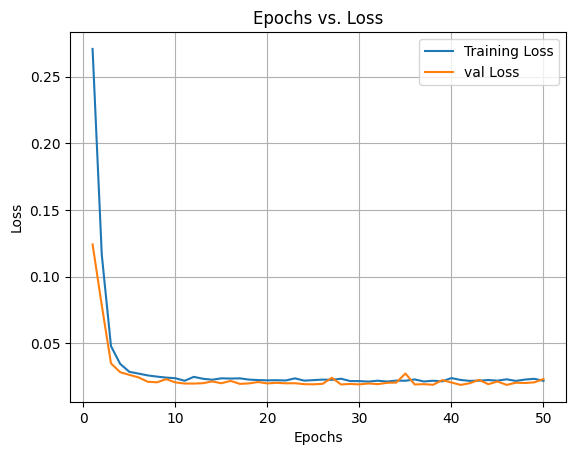

In [36]:
import matplotlib.pyplot as plt

# Model fitting code
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val),batch_size=64)

# Extracting loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting epochs vs. loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='val Loss')
plt.title('Epochs vs. Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
# Making predictions on the test data
predictions = model.predict(X_test)


5/5 [==============================] - 0s 7ms/step


In [47]:
X_test.shape

(148, 1, 12)

In [48]:
type(predictions[0][0])

numpy.float32

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)  # or mse**(0.5) 
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.013074414465570498


In [50]:
# denormalized_value = (normalized_value * (max_value - min_value)) + min_value
denormalized_value =  (predictions[-1][0] * (btc['close_nextday'].max() - btc['close_nextday'].min())+ btc['close_nextday'].min())
denormalized_value

26843.142430630924

In [51]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot(Y_test[:, 3], label='actual')
# plt.plot(y_pred[:, 0], label='predicted')
# plt.legend()
# plt.show()

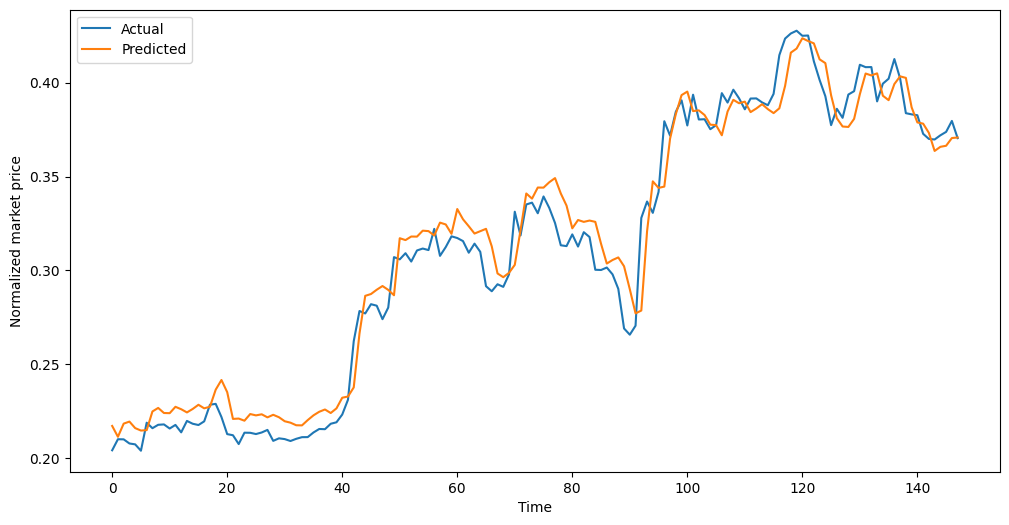

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Normalized market price')
plt.legend()
plt.show()

In [55]:
model.save('my_bitcoinLSTM_model.h5')

In [56]:
import pickle
with open('bitcoin_closemax.pkl','wb') as file:
    pickle.dump(btc['close_nextday'].max(),file)
with open('bitcoin_closemin.pkl','wb') as file:
    pickle.dump(btc['close_nextday'].min(),file)